In [1]:
from bs4 import BeautifulSoup
# import pandas as pd
from datetime import datetime, timedelta
from itertools import combinations
import json
import requests
import math
from typing import Optional, List, Dict
import os

from pydantic import BaseModel
from typing import Mapping
import numpy as np
import polars as pl
import hvplot.polars
import pandas as pd
import altair as alt
import math

from shared.utils import formalize_data_with_str
from shared.random_rules import RandomRules

In [2]:
rr = RandomRules(
  TOTAL_NUMBERS = 50,
  CHOOSE = 6,
  MAX_PRIMES = 3,
  N_VALUES=["1", "2", "3"],
  # Rangos de valores de las bolillas
  MIN_B_VALUES = [1, 2, 3, 4, 5, 6],
  MAX_B_VALUES = [45, 46, 47, 48, 49, 50]
)

In [3]:
url = 'https://resultados.latinka.com.pe/i.do?m=historico&t=0&s=41'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

tables = soup.select('table')
rows = tables[1].find_all('tr')

In [4]:
lst = []
post_str_b1 = None
post_str_b2 = None
post_str_b3 = None
post_str_b4 = None
post_str_b5 = None
post_str_blast = None
for row in rows:
  cols = [data.text.strip() for data in row.find_all('td')]
  
  id, bolillas_int, str_combo = formalize_data_with_str(bolillas_str=cols[2])
  cols.append(id)
  cols.append(bolillas_int)
  cols.extend([b for b in bolillas_int])
  cols.extend(str_combo)
  cols.append(post_str_b1)
  cols.append(post_str_b2)
  cols.append(post_str_b3)
  cols.append(post_str_b4)
  cols.append(post_str_b5)
  cols.append(post_str_blast)

  is_rare, reason = rr.is_rare_combination(bolillas_int, id)
  cols.append(is_rare)
  cols.append(reason)

  cols.append(rr.jumps_map(bolillas_int))
  cols.append(rr.unijump(bolillas_int))
  
  lst.append(cols)

  post_str_b1 = str_combo[0]
  post_str_b2 = str_combo[1]
  post_str_b3 = str_combo[2]
  post_str_b4 = str_combo[3]
  post_str_b5 = str_combo[4]
  post_str_blast = str_combo[-1]

with open('./gn_tnk_v3.json', 'w') as file: 
  json.dump(lst, file)

dfRows = pl.DataFrame(
  lst,
  schema=[
    'fecha', 'sorteo', 'bolillas', 'yapa', 'adicionales', 'sorteo_extra',
    'id', 'combo', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
    'str_b1', 'str_b2', 'str_b3', 'str_b4', 'str_b5', 'str_b6',
    'post_str_b1', 'post_str_b2', 'post_str_b3', 'post_str_b4', 'post_str_b5', 'post_str_blast',
    'is_rare_combination', 'reason',
    "jumps_map", "unijump"
  ],
  schema_overrides={
    'combo': pl.Array(pl.UInt8, 6),
    'b1': pl.UInt8,
    'b2': pl.UInt8,
    'b3': pl.UInt8,
    'b4': pl.UInt8,
    'b5': pl.UInt8,
    'b6': pl.UInt8,
    'reason': pl.UInt8
  },
  orient='row'
)

TOTAL_LINES = len(dfRows)
print(f'{TOTAL_LINES=}')
display(dfRows.head(10))
dfRows.write_parquet('dfrows_tnk.parquet')

TOTAL_LINES=2492


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 09/07/2025 ‚îÜ 1210   ‚îÜ 35 28 09 42   ‚îÜ 45   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 07_12_03_04_ ‚îÜ -32     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 31 16         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 06/07/2025 ‚îÜ 1209   ‚îÜ 29 20 14 11   ‚îÜ 35   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 08_03_01_05_ ‚îÜ -9      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 03 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 09           ‚îÜ         ‚îÇ
‚îÇ 02/07/2025 ‚îÜ 1208   ‚îÜ 14 28 32 07   ‚îÜ 36   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_04_14_01_ ‚îÜ 70      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 10 29         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 29/06/2025 ‚îÜ 1207   ‚îÜ 47 37 32 22   ‚îÜ 04   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 01_01_08_05_ ‚îÜ 35      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 23         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 25/06/2025 ‚îÜ 1206   ‚îÜ 38 30 08 27   ‚îÜ 17   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 06_13_03_08_ ‚îÜ -50     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 48 14         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 22/06/2025 ‚îÜ 1205   ‚îÜ 07 45 25 33   ‚îÜ 22   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 05_18_08_12_ ‚îÜ -66     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 02 46         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 18/06/2025 ‚îÜ 1204   ‚îÜ 26 45 28 09   ‚îÜ 14   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 15_02_02_17_ ‚îÜ -44     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 50         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 15/06/2025 ‚îÜ 1203   ‚îÜ 41 24 42 34   ‚îÜ 26   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 05_05_07_01_ ‚îÜ 25      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 29 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 11/06/2025 ‚îÜ 1202   ‚îÜ 22 39 20 19   ‚îÜ 32   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_01_02_16_ ‚îÜ -51     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 38 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 08/06/2025 ‚îÜ 1201   ‚îÜ 05 08 25 18   ‚îÜ 14   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_04_06_07_ ‚îÜ 4       ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 34 12         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 09           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [5]:
dfRows.item(0, 'b2')

16

In [6]:
import holoviews as hv
def plot_post_col (col: str, post_col: str, test_value: str | None = None):
  if test_value == None:
    test_value = dfRows.item(0, col)
    print(f'Setting {test_value=}')

  df_viz = dfRows \
    .filter(
      pl.col(col) == test_value,
      pl.col(post_col).is_not_null()
    ) \
    .group_by(
      post_col
    ).agg(pl.count(post_col).alias('count')) \
    .sort("count", descending=True)
  
  
  df_10_last = dfRows \
    .filter(
      pl.col(col) == test_value,
      pl.col(post_col).is_not_null()
    ) \
    .head(10)
  
  # Agrega una columna que sea el porcentaje de la frecuencia relativa
  total = df_viz['count'].sum()
  df_viz = df_viz.with_columns(
    ( (pl.col('count') / total) * 100 ).alias('percent')
  )

  mean_percent = df_viz['percent'].mean()
  mean_percent_75 = mean_percent * 75 / 50
  mean_percent_25 = mean_percent * 25 / 50

  chart = df_viz.hvplot.bar(
    x=post_col,
    y='percent'
  )

  chart = chart * hv.HLine(mean_percent).opts(color='red')
  chart = chart * hv.HLine(mean_percent_75).opts(color='blue')
  chart = chart * hv.HLine(mean_percent_25).opts(color='blue')
  
  chart.opts(default_tools=["pan"])

  df_jumps_map = dfRows \
    .filter(
      pl.col(col) == test_value,
      pl.col(post_col).is_not_null()
    ) \
    .group_by(
      'jumps_map'
    ).agg(pl.count('jumps_map').alias('count')) \
    .sort("count", descending=True)
  
  df_unijump = dfRows \
    .filter(
      pl.col(col) == test_value,
      pl.col(post_col).is_not_null()
    ) \
    .group_by(
      'unijump'
    ).agg(pl.count('unijump').alias('count')) \
    .sort("count", descending=True)


  print(f'df_viz FOR {col} = {test_value}')
  display(df_viz)

  display(chart)
  

  print(f'df_10_last FOR {col} = {test_value}')
  last_results = list(set(df_10_last[post_col][0:3]))
  print(f'Last 3 results {last_results=}')
  display(df_10_last)
  
  print(f'df_jumps_map FOR {col} = {test_value}')
  display(df_jumps_map)
  # display(df_unijump)

  print(f'df_unijump FOR {col} = {test_value}')
  display(df_unijump)

  lst_post_str_b = df_viz.filter(pl.col('percent') >= mean_percent)[post_col].to_list()
  lst_jumps_map = df_jumps_map['jumps_map'].to_list() # Used to discard
  
  return lst_post_str_b, lst_jumps_map, last_results

In [7]:
possible_b1, exclude_jump_maps_b1, last_post_b1 = plot_post_col(col='str_b1', post_col='post_str_b1')

Setting test_value='09'
df_viz FOR str_b1 = 09


shape: (20, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b1 ‚îÜ count ‚îÜ percent   ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---       ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 01          ‚îÜ 18    ‚îÜ 15.652174 ‚îÇ
‚îÇ 02          ‚îÜ 15    ‚îÜ 13.043478 ‚îÇ
‚îÇ 06          ‚îÜ 12    ‚îÜ 10.434783 ‚îÇ
‚îÇ 04          ‚îÜ 10    ‚îÜ 8.695652  ‚îÇ
‚îÇ 05          ‚îÜ 9     ‚îÜ 7.826087  ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 19          ‚îÜ 2     ‚îÜ 1.73913   ‚îÇ
‚îÇ 10          ‚îÜ 1     ‚îÜ 0.869565  ‚îÇ
‚îÇ 21          ‚îÜ 1     ‚îÜ 0.869565  ‚îÇ
‚îÇ 16          ‚îÜ 1     ‚îÜ 0.869565  ‚îÇ
‚îÇ 20          ‚îÜ 1     ‚îÜ 0.869565  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b1]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b1 = 09
Last 3 results last_results=['02', '07']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 18/06/2025 ‚îÜ 1204   ‚îÜ 26 45 28 09   ‚îÜ 14   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 15_02_02_17_ ‚îÜ -44     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 50         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 18/05/2025 ‚îÜ 1195   ‚îÜ 11 13 42 09   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 02_02_02_18_ ‚îÜ -57     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 33 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 09           ‚îÜ         ‚îÇ
‚îÇ 04/05/2025 ‚îÜ 1191   ‚îÜ 09 35 19 15   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 01_05_04_16_ ‚îÜ -57     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 37 10         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 23/04/2025 ‚îÜ 1188   ‚îÜ 22 16 20 33   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 07_04_02_11_ ‚îÜ -39     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 09         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 02/03/2025 ‚îÜ 1173   ‚îÜ 39 09 28 46   ‚îÜ 15   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 09_10_11_05_ ‚îÜ 17      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 18 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 01/01/2025 ‚îÜ 1156   ‚îÜ 33 24 09 38   ‚îÜ 15   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 13_02_09_05_ ‚îÜ 47      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 22 46         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 08           ‚îÜ         ‚îÇ
‚îÇ 01/12/2024 ‚îÜ 1147   ‚îÜ 42 09 27 12   ‚îÜ 13   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 03_03_12_08_ ‚îÜ 38      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 13/11/2024 ‚îÜ 1142   ‚îÜ 49 19 35 09   ‚îÜ 45   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 08_01_01_16_ ‚îÜ -40     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 17 18         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 14           ‚îÜ         ‚îÇ
‚îÇ 10/11/2024 ‚îÜ 1141   ‚îÜ 41 38 46 09   ‚îÜ 18   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 22_07_02_01_ ‚îÜ 7       ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 40 31         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 19/06/2024 ‚îÜ 1100   ‚îÜ 37 31 21 15   ‚îÜ 06   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 10     ‚îÜ 06_06_06_04_ ‚îÜ 8       ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 09 27         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b1 = 09


shape: (115, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 13_02_09_05_08 ‚îÜ 1     ‚îÇ
‚îÇ 03_10_07_07_02 ‚îÜ 1     ‚îÇ
‚îÇ 08_05_12_07_03 ‚îÜ 1     ‚îÇ
‚îÇ 04_14_01_06_07 ‚îÜ 1     ‚îÇ
‚îÇ 15_05_08_04_01 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 04_09_09_05_05 ‚îÜ 1     ‚îÇ
‚îÇ 01_05_07_01_11 ‚îÜ 1     ‚îÇ
‚îÇ 01_15_08_02_01 ‚îÜ 1     ‚îÇ
‚îÇ 01_02_13_15_01 ‚îÜ 1     ‚îÇ
‚îÇ 03_08_12_03_08 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b1 = 09


shape: (86, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ -6      ‚îÜ 3     ‚îÇ
‚îÇ -21     ‚îÜ 3     ‚îÇ
‚îÇ 11      ‚îÜ 3     ‚îÇ
‚îÇ 7       ‚îÜ 3     ‚îÇ
‚îÇ 4       ‚îÜ 2     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 35      ‚îÜ 1     ‚îÇ
‚îÇ -47     ‚îÜ 1     ‚îÇ
‚îÇ 18      ‚îÜ 1     ‚îÇ
‚îÇ -48     ‚îÜ 1     ‚îÇ
‚îÇ 41      ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [8]:
possible_b2, exclude_jump_maps_b2, last_post_b2 = plot_post_col(col='str_b2', post_col='post_str_b2')

Setting test_value='16'
df_viz FOR str_b2 = 16


shape: (27, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b2 ‚îÜ count ‚îÜ percent  ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 12          ‚îÜ 9     ‚îÜ 7.627119 ‚îÇ
‚îÇ 11          ‚îÜ 8     ‚îÜ 6.779661 ‚îÇ
‚îÇ 13          ‚îÜ 8     ‚îÜ 6.779661 ‚îÇ
‚îÇ 08          ‚îÜ 7     ‚îÜ 5.932203 ‚îÇ
‚îÇ 06          ‚îÜ 6     ‚îÜ 5.084746 ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 24          ‚îÜ 2     ‚îÜ 1.694915 ‚îÇ
‚îÇ 26          ‚îÜ 2     ‚îÜ 1.694915 ‚îÇ
‚îÇ 27          ‚îÜ 2     ‚îÜ 1.694915 ‚îÇ
‚îÇ 25          ‚îÜ 2     ‚îÜ 1.694915 ‚îÇ
‚îÇ 04          ‚îÜ 2     ‚îÜ 1.694915 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b2]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b2 = 16
Last 3 results last_results=['08', '12']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 23/04/2025 ‚îÜ 1188   ‚îÜ 22 16 20 33   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 07_04_02_11_ ‚îÜ -39     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 09         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 06/04/2025 ‚îÜ 1183   ‚îÜ 34 42 05 49   ‚îÜ 29   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 11_11_07_08_ ‚îÜ -16     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 16 27         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 12/03/2025 ‚îÜ 1176   ‚îÜ 44 34 07 17   ‚îÜ 11   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 09_01_15_02_ ‚îÜ 97      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 16 32         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 27/10/2024 ‚îÜ 1137   ‚îÜ 06 27 32 16   ‚îÜ 42   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 10_08_03_05_ ‚îÜ -9      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 47         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 15           ‚îÜ         ‚îÇ
‚îÇ 18/08/2024 ‚îÜ 1117   ‚îÜ 47 16 46 15   ‚îÜ 27   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 01_20_04_06_ ‚îÜ -78     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 40 36         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 27/08/2023 ‚îÜ 1015   ‚îÜ 20 22 38 28   ‚îÜ 36   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 4      ‚îÜ 02_04_02_06_ ‚îÜ -16     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 16 14         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 10           ‚îÜ         ‚îÇ
‚îÇ 23/04/2023 ‚îÜ 0979   ‚îÜ 16 25 26 12   ‚îÜ 07   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_09_01_04_ ‚îÜ -30     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 30 42         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 12           ‚îÜ         ‚îÇ
‚îÇ 22/03/2023 ‚îÜ 0970   ‚îÜ 27 31 01 16   ‚îÜ 35   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 15_11_02_02_ ‚îÜ -16     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 29 40         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 09           ‚îÜ         ‚îÇ
‚îÇ 10/08/2022 ‚îÜ 0906   ‚îÜ 26 37 16 02   ‚îÜ 45   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 1      ‚îÜ 14_07_03_11_ ‚îÜ -36     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 23 41         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 04           ‚îÜ         ‚îÇ
‚îÇ 15/05/2022 ‚îÜ 0881   ‚îÜ 22 16 41 09   ‚îÜ 14   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 07_06_05_07_ ‚îÜ -8      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 34 27         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b2 = 16


shape: (118, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 13_02_11_05_04 ‚îÜ 1     ‚îÇ
‚îÇ 03_03_06_05_11 ‚îÜ 1     ‚îÇ
‚îÇ 01_02_04_06_06 ‚îÜ 1     ‚îÇ
‚îÇ 07_06_05_07_07 ‚îÜ 1     ‚îÇ
‚îÇ 15_17_01_08_02 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 15_08_10_05_06 ‚îÜ 1     ‚îÇ
‚îÇ 11_05_10_03_11 ‚îÜ 1     ‚îÇ
‚îÇ 14_07_17_02_03 ‚îÜ 1     ‚îÇ
‚îÇ 05_11_08_03_06 ‚îÜ 1     ‚îÇ
‚îÇ 05_06_01_08_03 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b2 = 16


shape: (79, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 7       ‚îÜ 4     ‚îÇ
‚îÇ 30      ‚îÜ 3     ‚îÇ
‚îÇ 0       ‚îÜ 3     ‚îÇ
‚îÇ 1       ‚îÜ 3     ‚îÇ
‚îÇ -4      ‚îÜ 3     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ -5      ‚îÜ 1     ‚îÇ
‚îÇ -59     ‚îÜ 1     ‚îÇ
‚îÇ -21     ‚îÜ 1     ‚îÇ
‚îÇ 113     ‚îÜ 1     ‚îÇ
‚îÇ 24      ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [9]:
possible_b3, exclude_jump_maps_b3, last_post_b3 = plot_post_col(col='str_b3', post_col='post_str_b3')

Setting test_value='28'


df_viz FOR str_b3 = 28


shape: (30, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b3 ‚îÜ count ‚îÜ percent  ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 16          ‚îÜ 5     ‚îÜ 7.352941 ‚îÇ
‚îÇ 15          ‚îÜ 5     ‚îÜ 7.352941 ‚îÇ
‚îÇ 18          ‚îÜ 5     ‚îÜ 7.352941 ‚îÇ
‚îÇ 17          ‚îÜ 4     ‚îÜ 5.882353 ‚îÇ
‚îÇ 14          ‚îÜ 4     ‚îÜ 5.882353 ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 28          ‚îÜ 1     ‚îÜ 1.470588 ‚îÇ
‚îÇ 22          ‚îÜ 1     ‚îÜ 1.470588 ‚îÇ
‚îÇ 24          ‚îÜ 1     ‚îÜ 1.470588 ‚îÇ
‚îÇ 06          ‚îÜ 1     ‚îÜ 1.470588 ‚îÇ
‚îÇ 13          ‚îÜ 1     ‚îÜ 1.470588 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b3]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b3 = 28
Last 3 results last_results=['17', '29', '12']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 02/03/2025 ‚îÜ 1173   ‚îÜ 39 09 28 46   ‚îÜ 15   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 09_10_11_05_ ‚îÜ 17      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 18 44         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 18/12/2024 ‚îÜ 1152   ‚îÜ 22 28 33 19   ‚îÜ 44   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_06_05_02_ ‚îÜ 13      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 47 35         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 12           ‚îÜ         ‚îÇ
‚îÇ 11/09/2024 ‚îÜ 1124   ‚îÜ 04 41 07 28   ‚îÜ 20   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 03_21_01_12_ ‚îÜ -118    ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 29 46         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 21/08/2024 ‚îÜ 1118   ‚îÜ 40 25 27 28   ‚îÜ 11   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 02_01_02_09_ ‚îÜ -25     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 39 30         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 14/01/2024 ‚îÜ 1055   ‚îÜ 47 27 20 44   ‚îÜ 43   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 07_01_13_03_ ‚îÜ 72      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 41 28         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 13/09/2023 ‚îÜ 1020   ‚îÜ 42 28 41 48   ‚îÜ 11   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 05_04_13_01_ ‚îÜ 69      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 24 19         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 06/09/2023 ‚îÜ 1018   ‚îÜ 28 29 46 27   ‚îÜ 08   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 21_01_01_17_ ‚îÜ -43     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 48 06         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 17/05/2023 ‚îÜ 0986   ‚îÜ 43 38 15 21   ‚îÜ 08   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 06_07_05_05_ ‚îÜ -7      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 33 28         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 11/01/2023 ‚îÜ 0950   ‚îÜ 43 34 28 38   ‚îÜ 06   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 10_03_06_04_ ‚îÜ 23      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 25 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 02/10/2022 ‚îÜ 0921   ‚îÜ 37 24 09 44   ‚îÜ 10   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 15_04_04_05_ ‚îÜ 10      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 32 28         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b3 = 28


shape: (68, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 16_10_01_06_05 ‚îÜ 1     ‚îÇ
‚îÇ 06_07_05_05_05 ‚îÜ 1     ‚îÇ
‚îÇ 03_23_05_05_05 ‚îÜ 1     ‚îÇ
‚îÇ 12_12_02_04_06 ‚îÜ 1     ‚îÇ
‚îÇ 02_08_03_06_06 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 08_11_07_04_05 ‚îÜ 1     ‚îÇ
‚îÇ 17_07_02_03_06 ‚îÜ 1     ‚îÇ
‚îÇ 11_06_09_03_02 ‚îÜ 1     ‚îÇ
‚îÇ 02_11_04_04_04 ‚îÜ 1     ‚îÇ
‚îÇ 03_21_01_12_05 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b3 = 28


shape: (52, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 28      ‚îÜ 3     ‚îÇ
‚îÇ -7      ‚îÜ 3     ‚îÇ
‚îÇ 1       ‚îÜ 2     ‚îÇ
‚îÇ 10      ‚îÜ 2     ‚îÇ
‚îÇ -22     ‚îÜ 2     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ -46     ‚îÜ 1     ‚îÇ
‚îÇ -49     ‚îÜ 1     ‚îÇ
‚îÇ -92     ‚îÜ 1     ‚îÇ
‚îÇ 25      ‚îÜ 1     ‚îÇ
‚îÇ 72      ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [10]:
possible_b4, exclude_jump_maps_b4, last_post_b4 = plot_post_col(col='str_b4', post_col='post_str_b4')

Setting test_value='31'
df_viz FOR str_b4 = 31


shape: (32, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b4 ‚îÜ count ‚îÜ percent  ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 21          ‚îÜ 8     ‚îÜ 7.33945  ‚îÇ
‚îÇ 30          ‚îÜ 7     ‚îÜ 6.422018 ‚îÇ
‚îÇ 19          ‚îÜ 6     ‚îÜ 5.504587 ‚îÇ
‚îÇ 31          ‚îÜ 6     ‚îÜ 5.504587 ‚îÇ
‚îÇ 28          ‚îÜ 6     ‚îÜ 5.504587 ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 33          ‚îÜ 1     ‚îÜ 0.917431 ‚îÇ
‚îÇ 41          ‚îÜ 1     ‚îÜ 0.917431 ‚îÇ
‚îÇ 42          ‚îÜ 1     ‚îÜ 0.917431 ‚îÇ
‚îÇ 10          ‚îÜ 1     ‚îÜ 0.917431 ‚îÇ
‚îÇ 40          ‚îÜ 1     ‚îÜ 0.917431 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b4]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b4 = 31
Last 3 results last_results=['31', '34', '30']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 02/04/2025 ‚îÜ 1182   ‚îÜ 46 10 23 31   ‚îÜ 50   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 12_01_08_09_ ‚îÜ 26      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 40 22         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 30/03/2025 ‚îÜ 1181   ‚îÜ 46 29 25 31   ‚îÜ 13   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_01_02_15_ ‚îÜ -48     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 28 47         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 19/02/2025 ‚îÜ 1170   ‚îÜ 44 02 19 47   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 1      ‚îÜ 17_10_02_13_ ‚îÜ -60     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 29 31         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 22/01/2025 ‚îÜ 1162   ‚îÜ 21 10 49 31   ‚îÜ 14   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_11_10_01_ ‚îÜ 33      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 32 06         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 17           ‚îÜ         ‚îÇ
‚îÇ 03/03/2024 ‚îÜ 1069   ‚îÜ 25 31 06 27   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 19_02_04_02_ ‚îÜ 42      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 33 48         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 15           ‚îÜ         ‚îÇ
‚îÇ 18/02/2024 ‚îÜ 1065   ‚îÜ 42 24 31 12   ‚îÜ 28   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 11_01_07_04_ ‚îÜ 40      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 23         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 22/10/2023 ‚îÜ 1031   ‚îÜ 06 38 31 47   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 04_03_18_07_ ‚îÜ 81      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 13 10         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 09           ‚îÜ         ‚îÇ
‚îÇ 08/10/2023 ‚îÜ 1027   ‚îÜ 46 10 42 17   ‚îÜ 41   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_03_14_11_ ‚îÜ 36      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 31 14         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 04           ‚îÜ         ‚îÇ
‚îÇ 24/09/2023 ‚îÜ 1023   ‚îÜ 42 38 04 06   ‚îÜ 27   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 02_08_17_07_ ‚îÜ 48      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 14 31         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 04           ‚îÜ         ‚îÇ
‚îÇ 23/07/2023 ‚îÜ 1005   ‚îÜ 15 38 31 09   ‚îÜ 34   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 06_11_05_07_ ‚îÜ -31     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 26 43         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b4 = 31


shape: (109, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 05_02_09_03_09 ‚îÜ 1     ‚îÇ
‚îÇ 07_08_14_01_09 ‚îÜ 1     ‚îÇ
‚îÇ 02_13_08_02_09 ‚îÜ 1     ‚îÇ
‚îÇ 06_03_20_03_09 ‚îÜ 1     ‚îÇ
‚îÇ 07_02_02_02_04 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 04_20_01_04_07 ‚îÜ 1     ‚îÇ
‚îÇ 03_01_02_15_01 ‚îÜ 1     ‚îÇ
‚îÇ 13_09_07_02_07 ‚îÜ 1     ‚îÇ
‚îÇ 04_01_13_01_02 ‚îÜ 1     ‚îÇ
‚îÇ 07_01_12_07_06 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b4 = 31


shape: (82, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 7       ‚îÜ 4     ‚îÇ
‚îÇ 48      ‚îÜ 3     ‚îÇ
‚îÇ 23      ‚îÜ 3     ‚îÇ
‚îÇ -7      ‚îÜ 3     ‚îÇ
‚îÇ -1      ‚îÜ 3     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 9       ‚îÜ 1     ‚îÇ
‚îÇ 100     ‚îÜ 1     ‚îÇ
‚îÇ 53      ‚îÜ 1     ‚îÇ
‚îÇ 148     ‚îÜ 1     ‚îÇ
‚îÇ -108    ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [11]:
possible_b5, exclude_jump_maps_b5, last_post_b5 = plot_post_col(col='str_b5', post_col='post_str_b5')

Setting test_value='35'
df_viz FOR str_b5 = 35


shape: (33, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_b5 ‚îÜ count ‚îÜ percent  ‚îÇ
‚îÇ ---         ‚îÜ ---   ‚îÜ ---      ‚îÇ
‚îÇ str         ‚îÜ u32   ‚îÜ f64      ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 32          ‚îÜ 10    ‚îÜ 7.352941 ‚îÇ
‚îÇ 35          ‚îÜ 9     ‚îÜ 6.617647 ‚îÇ
‚îÇ 25          ‚îÜ 8     ‚îÜ 5.882353 ‚îÇ
‚îÇ 34          ‚îÜ 8     ‚îÜ 5.882353 ‚îÇ
‚îÇ 40          ‚îÜ 8     ‚îÜ 5.882353 ‚îÇ
‚îÇ ‚Ä¶           ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶        ‚îÇ
‚îÇ 20          ‚îÜ 1     ‚îÜ 0.735294 ‚îÇ
‚îÇ 21          ‚îÜ 1     ‚îÜ 0.735294 ‚îÇ
‚îÇ 48          ‚îÜ 1     ‚îÜ 0.735294 ‚îÇ
‚îÇ 16          ‚îÜ 1     ‚îÜ 0.735294 ‚îÇ
‚îÇ 17          ‚îÜ 1     ‚îÜ 0.735294 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_b5]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b5 = 35
Last 3 results last_results=['33', '48', '40']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 04/05/2025 ‚îÜ 1191   ‚îÜ 09 35 19 15   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 01_05_04_16_ ‚îÜ -57     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 37 10         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 02           ‚îÜ         ‚îÇ
‚îÇ 09/02/2025 ‚îÜ 1167   ‚îÜ 34 03 46 35   ‚îÜ 18   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 09_21_01_01_ ‚îÜ -62     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 33 12         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 11           ‚îÜ         ‚îÇ
‚îÇ 18/12/2024 ‚îÜ 1152   ‚îÜ 22 28 33 19   ‚îÜ 44   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 03_06_05_02_ ‚îÜ 13      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 47 35         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 12           ‚îÜ         ‚îÇ
‚îÇ 01/12/2024 ‚îÜ 1147   ‚îÜ 42 09 27 12   ‚îÜ 13   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 03_03_12_08_ ‚îÜ 38      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 13/11/2024 ‚îÜ 1142   ‚îÜ 49 19 35 09   ‚îÜ 45   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 24     ‚îÜ 08_01_01_16_ ‚îÜ -40     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 17 18         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 14           ‚îÜ         ‚îÇ
‚îÇ 21/02/2024 ‚îÜ 1066   ‚îÜ 14 35 30 39   ‚îÜ 05   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 06_06_16_05_ ‚îÜ 62      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 08 02         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 04           ‚îÜ         ‚îÇ
‚îÇ 18/02/2024 ‚îÜ 1065   ‚îÜ 42 24 31 12   ‚îÜ 28   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 11_01_07_04_ ‚îÜ 40      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 23         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 03/01/2024 ‚îÜ 1052   ‚îÜ 35 28 12 15   ‚îÜ 29   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 08_03_13_07_ ‚îÜ 50      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 04 39         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 04           ‚îÜ         ‚îÇ
‚îÇ 08/11/2023 ‚îÜ 1036   ‚îÜ 35 02 11 41   ‚îÜ 07   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 1      ‚îÜ 06_03_08_16_ ‚îÜ -16     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 19 08         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 01/11/2023 ‚îÜ 1034   ‚îÜ 35 23 21 46   ‚îÜ 25   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 10_02_05_07_ ‚îÜ 15      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 11 28         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 11           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b5 = 35


shape: (136, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 04_08_16_02_07 ‚îÜ 1     ‚îÇ
‚îÇ 07_02_07_02_04 ‚îÜ 1     ‚îÇ
‚îÇ 13_03_10_08_06 ‚îÜ 1     ‚îÇ
‚îÇ 06_06_01_11_09 ‚îÜ 1     ‚îÇ
‚îÇ 02_02_25_05_08 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 01_07_19_05_03 ‚îÜ 1     ‚îÇ
‚îÇ 01_15_08_02_01 ‚îÜ 1     ‚îÇ
‚îÇ 03_16_01_04_10 ‚îÜ 1     ‚îÇ
‚îÇ 14_17_01_01_05 ‚îÜ 1     ‚îÇ
‚îÇ 13_06_03_02_08 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b5 = 35


shape: (97, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1       ‚îÜ 4     ‚îÇ
‚îÇ -45     ‚îÜ 4     ‚îÇ
‚îÇ 22      ‚îÜ 3     ‚îÇ
‚îÇ 35      ‚îÜ 3     ‚îÇ
‚îÇ -16     ‚îÜ 3     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 53      ‚îÜ 1     ‚îÇ
‚îÇ -92     ‚îÜ 1     ‚îÇ
‚îÇ 44      ‚îÜ 1     ‚îÇ
‚îÇ 63      ‚îÜ 1     ‚îÇ
‚îÇ -30     ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [12]:
possible_blast, exclude_jump_maps_blast, last_post_blast = plot_post_col(col='str_b6', post_col='post_str_blast')

Setting test_value='42'
df_viz FOR str_b6 = 42


shape: (27, 3)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ post_str_blast ‚îÜ count ‚îÜ percent   ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÜ ---       ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÜ f64       ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 43             ‚îÜ 31    ‚îÜ 14.220183 ‚îÇ
‚îÇ 45             ‚îÜ 26    ‚îÜ 11.926606 ‚îÇ
‚îÇ 42             ‚îÜ 24    ‚îÜ 11.009174 ‚îÇ
‚îÇ 44             ‚îÜ 17    ‚îÜ 7.798165  ‚îÇ
‚îÇ 35             ‚îÜ 15    ‚îÜ 6.880734  ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÜ ‚Ä¶         ‚îÇ
‚îÇ 49             ‚îÜ 1     ‚îÜ 0.458716  ‚îÇ
‚îÇ 24             ‚îÜ 1     ‚îÜ 0.458716  ‚îÇ
‚îÇ 46             ‚îÜ 1     ‚îÜ 0.458716  ‚îÇ
‚îÇ 30             ‚îÜ 1     ‚îÜ 0.458716  ‚îÇ
‚îÇ 27             ‚îÜ 1     ‚îÜ 0.458716  ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

:Overlay
   .Bars.I    :Bars   [post_str_blast]   (percent)
   .HLine.I   :HLine   [x,y]
   .HLine.II  :HLine   [x,y]
   .HLine.III :HLine   [x,y]

df_10_last FOR str_b6 = 42
Last 3 results last_results=['49', '35', '45']


shape: (10, 30)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ fecha      ‚îÜ sorteo ‚îÜ bolillas      ‚îÜ yapa ‚îÜ ‚Ä¶ ‚îÜ is_rare_combi ‚îÜ reason ‚îÜ jumps_map    ‚îÜ unijump ‚îÇ
‚îÇ ---        ‚îÜ ---    ‚îÜ ---           ‚îÜ ---  ‚îÜ   ‚îÜ nation        ‚îÜ ---    ‚îÜ ---          ‚îÜ ---     ‚îÇ
‚îÇ str        ‚îÜ str    ‚îÜ str           ‚îÜ str  ‚îÜ   ‚îÜ ---           ‚îÜ u8     ‚îÜ str          ‚îÜ i64     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ               ‚îÜ      ‚îÜ   ‚îÜ bool          ‚îÜ        ‚îÜ              ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 18/05/2025 ‚îÜ 1195   ‚îÜ 11 13 42 09   ‚îÜ 46   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 02_02_02_18_ ‚îÜ -57     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 33 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 09           ‚îÜ         ‚îÇ
‚îÇ 20/04/2025 ‚îÜ 1187   ‚îÜ 33 02 06 42   ‚îÜ 37   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 04_05_22_01_ ‚îÜ 120     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 34 11         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 08           ‚îÜ         ‚îÇ
‚îÇ 19/03/2025 ‚îÜ 1178   ‚îÜ 32 41 42 37   ‚îÜ 48   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 28_02_03_04_ ‚îÜ 23      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 34 04         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 01           ‚îÜ         ‚îÇ
‚îÇ 01/12/2024 ‚îÜ 1147   ‚îÜ 42 09 27 12   ‚îÜ 13   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 03_03_12_08_ ‚îÜ 38      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 15         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 30/10/2024 ‚îÜ 1138   ‚îÜ 42 15 22 09   ‚îÜ 21   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 02_06_03_04_ ‚îÜ 0       ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 07 18         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 20           ‚îÜ         ‚îÇ
‚îÇ 18/02/2024 ‚îÜ 1065   ‚îÜ 42 24 31 12   ‚îÜ 28   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 11_01_07_04_ ‚îÜ 40      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 23         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 07           ‚îÜ         ‚îÇ
‚îÇ 14/02/2024 ‚îÜ 1064   ‚îÜ 42 03 18 07   ‚îÜ 30   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 04_11_11_10_ ‚îÜ -11     ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 29 39         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 03           ‚îÜ         ‚îÇ
‚îÇ 24/12/2023 ‚îÜ 1049   ‚îÜ 36 08 42 25   ‚îÜ 28   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 16     ‚îÜ 17_04_06_01_ ‚îÜ 39      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 35 29         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 06           ‚îÜ         ‚îÇ
‚îÇ 13/12/2023 ‚îÜ 1046   ‚îÜ 10 42 37 02   ‚îÜ 25   ‚îÜ ‚Ä¶ ‚îÜ true          ‚îÜ 8      ‚îÜ 01_08_22_05_ ‚îÜ 86      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 32 01         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 05           ‚îÜ         ‚îÇ
‚îÇ 24/09/2023 ‚îÜ 1023   ‚îÜ 42 38 04 06   ‚îÜ 27   ‚îÜ ‚Ä¶ ‚îÜ false         ‚îÜ 0      ‚îÜ 02_08_17_07_ ‚îÜ 48      ‚îÇ
‚îÇ            ‚îÜ        ‚îÜ 14 31         ‚îÜ      ‚îÜ   ‚îÜ               ‚îÜ        ‚îÜ 04           ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_jumps_map FOR str_b6 = 42


shape: (218, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ jumps_map      ‚îÜ count ‚îÇ
‚îÇ ---            ‚îÜ ---   ‚îÇ
‚îÇ str            ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 21_01_03_05_10 ‚îÜ 1     ‚îÇ
‚îÇ 02_08_17_07_04 ‚îÜ 1     ‚îÇ
‚îÇ 02_01_13_05_13 ‚îÜ 1     ‚îÇ
‚îÇ 10_14_05_07_03 ‚îÜ 1     ‚îÇ
‚îÇ 07_04_01_15_07 ‚îÜ 1     ‚îÇ
‚îÇ ‚Ä¶              ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 12_07_03_04_15 ‚îÜ 1     ‚îÇ
‚îÇ 12_01_05_11_02 ‚îÜ 1     ‚îÇ
‚îÇ 11_14_02_01_11 ‚îÜ 1     ‚îÇ
‚îÇ 02_13_08_02_09 ‚îÜ 1     ‚îÇ
‚îÇ 03_16_03_02_08 ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

df_unijump FOR str_b6 = 42


shape: (131, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ unijump ‚îÜ count ‚îÇ
‚îÇ ---     ‚îÜ ---   ‚îÇ
‚îÇ i64     ‚îÜ u32   ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 15      ‚îÜ 8     ‚îÇ
‚îÇ 9       ‚îÜ 5     ‚îÇ
‚îÇ 11      ‚îÜ 5     ‚îÇ
‚îÇ 19      ‚îÜ 4     ‚îÇ
‚îÇ 20      ‚îÜ 4     ‚îÇ
‚îÇ ‚Ä¶       ‚îÜ ‚Ä¶     ‚îÇ
‚îÇ 69      ‚îÜ 1     ‚îÇ
‚îÇ -48     ‚îÜ 1     ‚îÇ
‚îÇ 56      ‚îÜ 1     ‚îÇ
‚îÇ -85     ‚îÜ 1     ‚îÇ
‚îÇ -91     ‚îÜ 1     ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [13]:
b_count = rr.CHOOSE
min_b = rr.MIN_B_VALUES[0]
max_b = rr.MAX_B_VALUES[-1]


combos = combinations(range(min_b, max_b + 1), b_count)
# print("generating combos: ", len(list(combos)))

In [14]:
parquet_file = './parquet_tnk_v3.parquet'

# check if parquet_file exists
if not os.path.exists(parquet_file):
  print(f'{parquet_file=} does not exists. creating')
  lst = []
  post_str_b1 = None
  post_str_blast = None
  for row in combos:
    cols = []
    str_row = " ".join([str(r).zfill(2) for r in row])
    id, bolillas_int, str_combo = formalize_data_with_str(bolillas_str=str_row)
    cols.append(id)
    cols.append(bolillas_int)
    cols.extend([b for b in bolillas_int])
    cols.extend(str_combo)
    cols.append(post_str_b1)
    cols.append(post_str_blast)

    is_rare, reason = rr.is_rare_combination(bolillas_int, id)
    cols.append(is_rare)
    cols.append(reason)

    cols.append(rr.jumps_map(bolillas_int))
    cols.append(rr.unijump(bolillas_int))
    
    lst.append(cols)

    post_str_b1 = str_combo[0]
    post_str_blast = str_combo[-1]

  df_Orows = pl.DataFrame(
    lst,
    schema=[
      # 'fecha', 'sorteo', 'bolillas',
      'id', 'combo', 'b1', 'b2', 'b3', 'b4', 'b5', 'b6',
      'str_b1', 'str_b2', 'str_b3', 'str_b4', 'str_b5', 'str_b6',
      'post_str_b1', 'post_str_blast',
      'is_rare_combination', 'reason',
      "jumps_map", "unijump"
    ],
    schema_overrides={
      'combo': pl.Array(pl.UInt8, 6),
      'b1': pl.UInt8,
      'b2': pl.UInt8,
      'b3': pl.UInt8,
      'b4': pl.UInt8,
      'b5': pl.UInt8,
      'b6': pl.UInt8,
      'reason': pl.UInt8
    },
    orient='row'
  )

  df_Orows.write_parquet(parquet_file)
  TOTAL_LINES = len(df_Orows)
  print(f'{TOTAL_LINES=} loaded to {parquet_file=}')

  display(df_Orows.head(10))
else:
  df_Orows = pl.read_parquet(parquet_file)

In [15]:
# possible_b1, exclude_jump_maps_b1
df_possible = df_Orows.filter(
  # pl.col("str_b1").is_in(["10", "11", "12", "13", "14", "15", "16"]),
  pl.col("str_b1").is_in(["04", "06"]),
  # pl.col("str_b1").is_in(possible_b1),
  # pl.col("str_b2").is_in(possible_b2),
  # pl.col("str_b3").is_in(possible_b3),
  # pl.col("str_b4").is_in(possible_b4),
  # pl.col("str_b5").is_in(possible_b5),
  # pl.col("str_b6").is_in(possible_blast),
  
  # ~pl.col("str_b1").is_in(last_post_b1),
  ~pl.col("str_b2").is_in(last_post_b2 + ["40", "41", "42", "43", "44", "45", "46", "47", "48", "49"]),
  ~pl.col("str_b3").is_in(last_post_b3 + ["40", "41", "42", "43", "44", "45", "46", "47", "48", "49"]),
  ~pl.col("str_b4").is_in(last_post_b4 + ["10", "11", "12", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25"]),
  ~pl.col("str_b5").is_in(last_post_b5 + ["27"]),
  ~pl.col("str_b6").is_in(last_post_blast + ["20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "45", "46", "47", "48", "49", "50"]),

  ~pl.col("jumps_map").is_in(exclude_jump_maps_b1 + exclude_jump_maps_b2 + exclude_jump_maps_b3 + exclude_jump_maps_b4 + exclude_jump_maps_b5 + exclude_jump_maps_blast),
  # ~pl.col("jumps_map").is_in(exclude_jump_maps_b1 + exclude_jump_maps_b2 + exclude_jump_maps_blast),
  pl.col("is_rare_combination") == False
)


display(df_possible)

shape: (122_872, 20)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ id           ‚îÜ combo         ‚îÜ b1  ‚îÜ b2  ‚îÜ ‚Ä¶ ‚îÜ is_rare_combin ‚îÜ reason ‚îÜ jumps_map     ‚îÜ unijump ‚îÇ
‚îÇ ---          ‚îÜ ---           ‚îÜ --- ‚îÜ --- ‚îÜ   ‚îÜ ation          ‚îÜ ---    ‚îÜ ---           ‚îÜ ---     ‚îÇ
‚îÇ str          ‚îÜ array[u8, 6]  ‚îÜ u8  ‚îÜ u8  ‚îÜ   ‚îÜ ---            ‚îÜ u8     ‚îÜ str           ‚îÜ i64     ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ bool           ‚îÜ        ‚îÜ               ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 040507081213 ‚îÜ [4, 5, ‚Ä¶ 13]  ‚îÜ 4   ‚îÜ 5   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_04_0 ‚îÜ -16     ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îÇ 040507081236 ‚îÜ [4, 5, ‚Ä¶ 36]  ‚îÜ 4   ‚îÜ 5   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_04_2 ‚îÜ 7       ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 4             ‚îÜ         ‚îÇ
‚îÇ 040507081237 ‚îÜ [4, 5, ‚Ä¶ 37]  ‚îÜ 4   ‚îÜ 5   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_04_2 ‚îÜ 8       ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 5             ‚îÜ         ‚îÇ
‚îÇ 040507081238 ‚îÜ [4, 5, ‚Ä¶ 38]  ‚îÜ 4   ‚îÜ 5   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_04_2 ‚îÜ 9       ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 6             ‚îÜ         ‚îÇ
‚îÇ 040507081239 ‚îÜ [4, 5, ‚Ä¶ 39]  ‚îÜ 4   ‚îÜ 5   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 01_02_01_04_2 ‚îÜ 10      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 7             ‚îÜ         ‚îÇ
‚îÇ ‚Ä¶            ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶   ‚îÜ ‚Ä¶ ‚îÜ ‚Ä¶              ‚îÜ ‚Ä¶      ‚îÜ ‚Ä¶             ‚îÜ ‚Ä¶       ‚îÇ
‚îÇ 063638394142 ‚îÜ [6, 36, ‚Ä¶ 42] ‚îÜ 6   ‚îÜ 36  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 30_02_01_02_0 ‚îÜ 21      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 1             ‚îÜ         ‚îÇ
‚îÇ 063638414244 ‚îÜ [6, 36, ‚Ä¶ 44] ‚îÜ 6   ‚îÜ 36  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 30_02_03_01_0 ‚îÜ 38      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 2             ‚îÜ         ‚îÇ
‚îÇ 063639414244 ‚îÜ [6, 36, ‚Ä¶ 44] ‚îÜ 6   ‚îÜ 36  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 30_03_02_01_0 ‚îÜ 28      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 2             ‚îÜ         ‚îÇ
‚îÇ 063738414244 ‚îÜ [6, 37, ‚Ä¶ 44] ‚îÜ 6   ‚îÜ 37  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 31_01_03_01_0 ‚îÜ 43      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 2             ‚îÜ         ‚îÇ
‚îÇ 063839414244 ‚îÜ [6, 38, ‚Ä¶ 44] ‚îÜ 6   ‚îÜ 38  ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 32_01_02_01_0 ‚îÜ 38      ‚îÇ
‚îÇ              ‚îÜ               ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ                ‚îÜ        ‚îÜ 2             ‚îÜ         ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚

In [16]:
df_possible.sample(n=1)


shape: (1, 20)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ id           ‚îÜ combo        ‚îÜ b1  ‚îÜ b2  ‚îÜ ‚Ä¶ ‚îÜ is_rare_combin ‚îÜ reason ‚îÜ jumps_map      ‚îÜ unijump ‚îÇ
‚îÇ ---          ‚îÜ ---          ‚îÜ --- ‚îÜ --- ‚îÜ   ‚îÜ ation          ‚îÜ ---    ‚îÜ ---            ‚îÜ ---     ‚îÇ
‚îÇ str          ‚îÜ array[u8, 6] ‚îÜ u8  ‚îÜ u8  ‚îÜ   ‚îÜ ---            ‚îÜ u8     ‚îÜ str            ‚îÜ i64     ‚îÇ
‚îÇ              ‚îÜ              ‚îÜ     ‚îÜ     ‚îÜ   ‚îÜ bool           ‚îÜ        ‚îÜ                ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 040621384243 ‚îÜ [4, 6, ‚Ä¶ 43] ‚îÜ 4   ‚îÜ 6   ‚îÜ ‚Ä¶ ‚îÜ false          ‚îÜ 0      ‚îÜ 02_15_17_04_01 ‚îÜ 29      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

# Aplicando Laplace + dist te√≥rica

In [17]:
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy.stats import norm

# Par√°metros por casilla
PARAMETROS_CASILLA = {
    "b1": {"rango": (1, 45), "mu": 5, "sigma": 5},
    "b2": {"rango": (2, 46), "mu": 13.5, "sigma": 5},
    "b3": {"rango": (3, 47), "mu": 21, "sigma": 4},
    "b4": {"rango": (4, 48), "mu": 28, "sigma": 4},
    "b5": {"rango": (5, 49), "mu": 35.5, "sigma": 5},
    "b6": {"rango": (6, 50), "mu": 45, "sigma": 5},
}

def calcular_probabilidades_hibridas(casilla, valores, suavizado=1, mezcla=0.5, top_n=5, graficar=False):
    # Obtener par√°metros
    param = PARAMETROS_CASILLA[casilla]
    r_min, r_max = param["rango"]
    mu = param["mu"]
    sigma = param["sigma"]
    
    rango = list(range(r_min, r_max + 1))
    total_posibles = len(rango)
    total_observaciones = len(valores)

    # --- Probabilidad te√≥rica (distribuci√≥n normal)
    dist_normal = norm(loc=mu, scale=sigma)
    p_teorica = {v: dist_normal.pdf(v) for v in rango}

    # Normalizar las probabilidades te√≥ricas
    suma_teorica = sum(p_teorica.values())
    for v in p_teorica:
        p_teorica[v] /= suma_teorica

    # --- Probabilidad emp√≠rica con Laplace
    conteo = defaultdict(int)
    for v in valores:
        conteo[v] += 1

    p_laplace = {
        v: (conteo[v] + suavizado) / (total_observaciones + total_posibles * suavizado)
        for v in rango
    }

    # --- Mezcla de ambos modelos
    p_combinada = {
        v: mezcla * p_teorica[v] + (1 - mezcla) * p_laplace[v]
        for v in rango
    }

    # Ordenar resultados
    p_ordenada = dict(sorted(p_combinada.items(), key=lambda x: x[1], reverse=True))

    # Graficar si se desea
    if graficar:
        plt.figure(figsize=(10, 4))
        plt.plot(list(p_teorica.keys()), list(p_teorica.values()), label='Distribuci√≥n Te√≥rica', linestyle='--', alpha=0.7)
        plt.plot(list(p_laplace.keys()), list(p_laplace.values()), label='Laplace (Emp√≠rica)', linestyle=':', alpha=0.7)
        plt.plot(list(p_combinada.keys()), list(p_combinada.values()), label='Combinada', linewidth=2)
        plt.title(f"Probabilidades combinadas para {casilla}")
        plt.xlabel("Valor")
        plt.ylabel("Probabilidad")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Retornar los valores m√°s probables
    return list(p_ordenada.items())[:top_n]


In [18]:
def next_gen_analyze (col_analyze: str, top_n: int = 10, body_size: int = 104):
  values_explore = dfRows[col_analyze].to_list()[0:body_size]
  values_explore.reverse()

  # valores m√°s probables usando mezcla 50% te√≥rica y 50% datos
  top_valores = calcular_probabilidades_hibridas(col_analyze, values_explore, mezcla=0.5, graficar=True, top_n=top_n)

  print(f"üéØ Siguientes valores m√°s probables para {col_analyze}:")
  result = []
  for val, prob in top_valores:
    print(f"  {val}: {prob:.4f}")
    result.append(val)
  
  return result


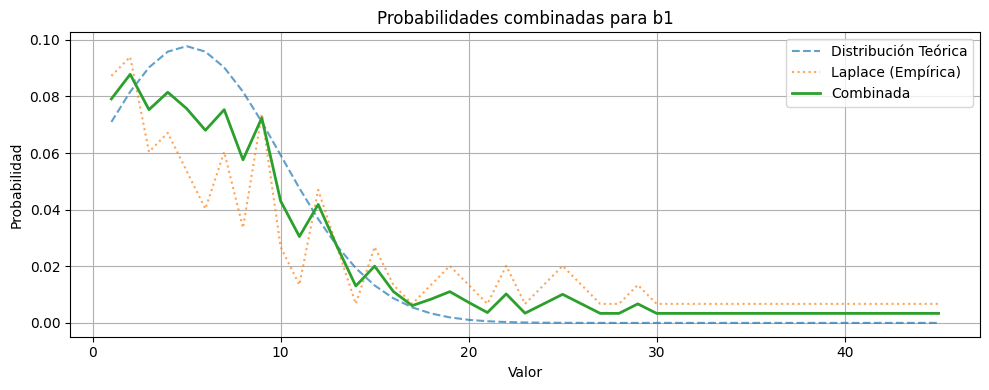

üéØ Siguientes valores m√°s probables para b1:
  2: 0.0878
  4: 0.0815
  1: 0.0791
  5: 0.0757
  3: 0.0753
  7: 0.0753
  9: 0.0724
  6: 0.0680
  8: 0.0576
  10: 0.0431


In [19]:
b1_vals = next_gen_analyze("b1", body_size=104)

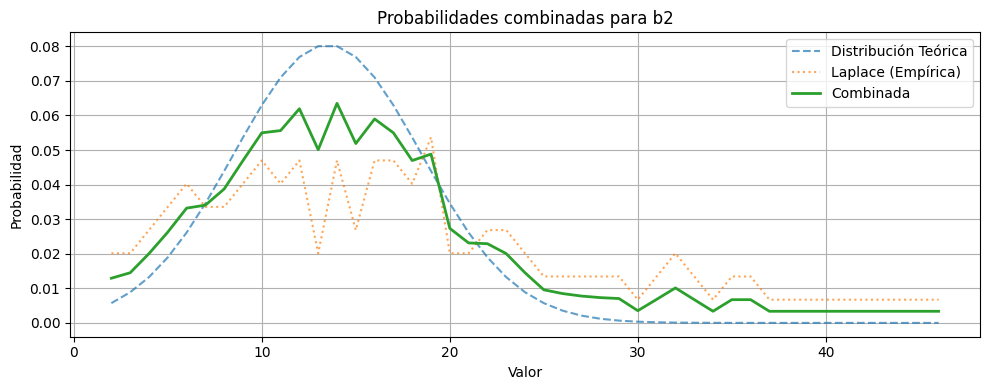

üéØ Siguientes valores m√°s probables para b2:
  14: 0.0635
  12: 0.0619
  16: 0.0590
  11: 0.0556
  10: 0.0550
  17: 0.0550
  15: 0.0519
  13: 0.0501
  19: 0.0488
  9: 0.0470


In [20]:
b2_vals = next_gen_analyze("b2", body_size=104)

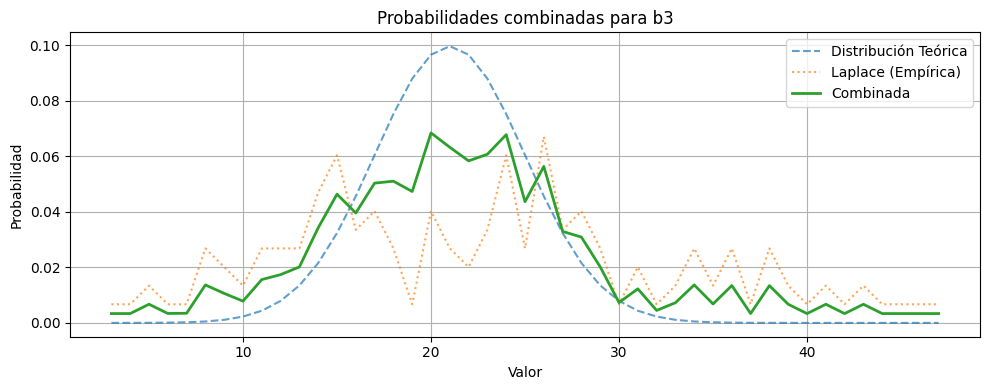

üéØ Siguientes valores m√°s probables para b3:
  20: 0.0685
  24: 0.0678
  21: 0.0633
  23: 0.0608
  22: 0.0584
  26: 0.0564
  18: 0.0511
  17: 0.0504
  19: 0.0474
  15: 0.0464


In [21]:
b3_vals = next_gen_analyze("b3", body_size=104)

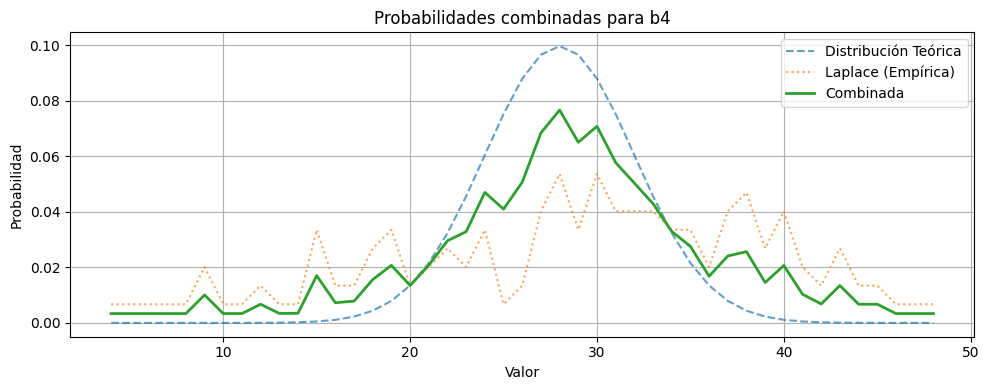

üéØ Siguientes valores m√°s probables para b4:
  28: 0.0767
  30: 0.0709
  27: 0.0685
  29: 0.0651
  31: 0.0578
  26: 0.0507
  32: 0.0504
  24: 0.0470
  33: 0.0430
  25: 0.0410


In [22]:
b4_vals = next_gen_analyze("b4", body_size=104)

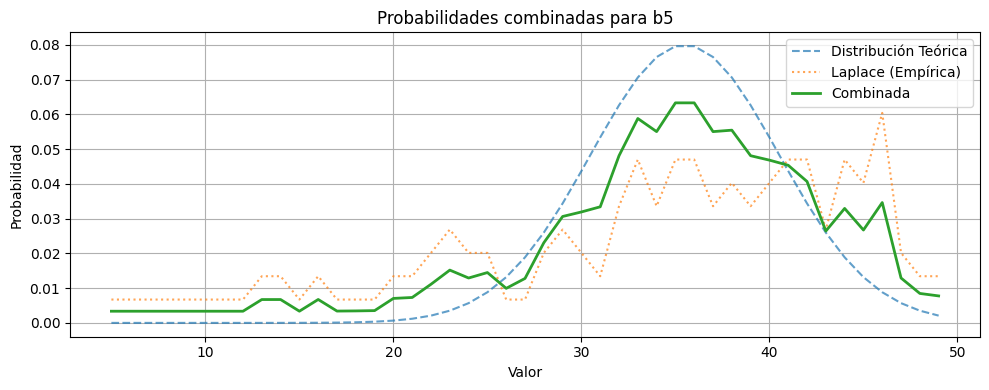

üéØ Siguientes valores m√°s probables para b5:
  35: 0.0633
  36: 0.0633
  33: 0.0588
  38: 0.0554
  34: 0.0550
  37: 0.0550
  32: 0.0481
  39: 0.0481
  40: 0.0468
  41: 0.0453


In [ ]:
b5_vals = next_gen_analyze("b5", body_size=104)

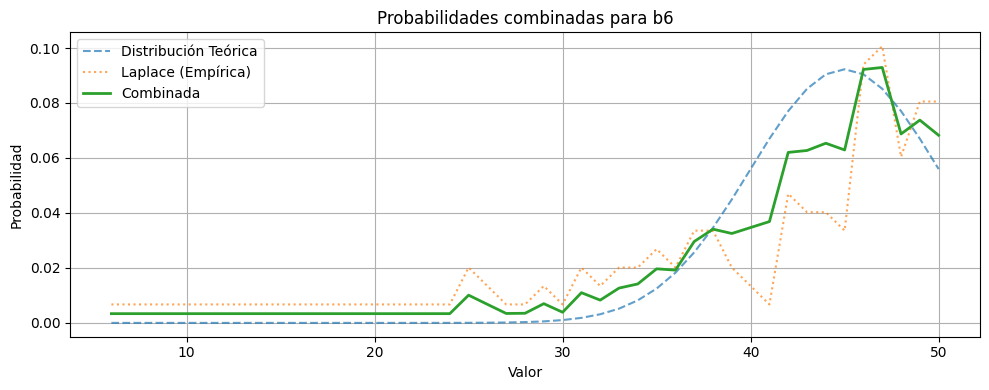

üéØ Siguientes valores m√°s probables para b6:
  47: 0.0929
  46: 0.0922
  49: 0.0738
  48: 0.0687
  50: 0.0683
  44: 0.0654
  45: 0.0629
  43: 0.0627
  42: 0.0620
  41: 0.0369


In [ ]:
b6_vals = next_gen_analyze("b6", body_size=104)